rozwiaz rownania metoda:
eulera, midpoint, rk4,
wyniki przedstaw jako wykres zaleznosci z od x

x(t0) = 1,

y(t0) = 1,

z(t0) = 1,

A = 10,

B = 25,

C = 8/3,

dt = 0.03

{
dx/dt = Ay-Ax

dy/dt = -xz+Bx-y

dz/dt = xy-Cz
}

dodstosowac deltaT i liczbe krokow

importy i stałe

In [78]:
import math
import matplotlib.pyplot as plt
import numpy as np

chwileCzasowe = 5000
a = 10
b = 25
c = 8/3

deltaT = 0.01

definicja obliczania metoda eulera

In [79]:
def euler():
    listaX = np.zeros(chwileCzasowe)
    listaY = np.zeros(chwileCzasowe)
    listaZ = np.zeros(chwileCzasowe)
    listaX[0] = listaY[0] = listaZ[0] = 1

    for i in range(1,chwileCzasowe):
        dx = a*listaY[i-1] - a*listaX[i-1]
        dy = -listaX[i-1]*listaZ[i-1] + b*listaX[i-1] - listaY[i-1]
        dz = listaX[i-1]*listaY[i-1] - c*listaZ[i-1]

        listaX[i] = listaX[i-1] + dx*deltaT
        listaY[i] = listaY[i-1] + dy*deltaT
        listaZ[i] = listaZ[i-1] + dz*deltaT

    return listaX, listaY, listaZ

definicja dla midpoint

In [80]:
def midpoint():
    listaX = np.zeros(chwileCzasowe)
    listaY = np.zeros(chwileCzasowe)
    listaZ = np.zeros(chwileCzasowe)
    listaX[0] = listaY[0] = listaZ[0] = 1
    for i in range(1,chwileCzasowe):
        dx1 = a*listaY[i-1] - a*listaX[i-1]
        dy1 = -listaX[i-1]*listaZ[i-1] + b*listaX[i-1] - listaY[i-1]
        dz1 = listaX[i-1]*listaY[i-1] - c*listaZ[i-1]

        #szacowanie srodka
        midX = listaX[i-1] + deltaT/2*dx1
        midY = listaY[i-1] + deltaT/2*dy1
        midZ = listaZ[i-1] + deltaT/2*dz1

        #obliczenie pochodnej w srodkowym
        dx2 = a*midY-a*midX
        dy2 = -midX*midZ + b*midX - midY
        dz2 = midX*midY - c*midZ

        #dodanie wartosci do tablicy
        listaX[i] = listaX[i-1] + dx2*deltaT
        listaY[i] = listaY[i-1] + dy2*deltaT
        listaZ[i] = listaZ[i-1] + dz2*deltaT

    return listaX, listaY, listaZ

definicja dla RK4

In [81]:
def rk4():
    listaX = np.zeros(chwileCzasowe)
    listaY = np.zeros(chwileCzasowe)
    listaZ = np.zeros(chwileCzasowe)
    listaX[0] = listaY[0] = listaZ[0] = 1
    for i in range(1, chwileCzasowe):
        x0 = listaX[i-1]
        y0 = listaY[i-1]
        z0 = listaZ[i-1]

        #na poczatku przedzialu (1/4)
        dx1 = a * y0 - a * x0
        dy1 = -x0 * z0 + b * x0 - y0
        dz1 = x0 * y0 - c * z0

        #szacowanie 2/4
        x1 = x0 + deltaT / 2 * dx1
        y1 = y0 + deltaT / 2 * dy1
        z1 = z0 + deltaT / 2 * dz1

        dx2 = a * y1 - a * x1
        dy2 = -x1 * z1 + b * x1 - y1
        dz2 = x1 * y1 - c * z1

        #szacowanie 3/4
        x2 = x0 + deltaT / 2 * dx2
        y2 = y0 + deltaT / 2 * dy2
        z2 = z0 + deltaT / 2 * dz2

        dx3 = a * y2 - a * x2
        dy3 = -x2 * z2 + b * x2 - y2
        dz3 = x2 * y2 - c * z2

        #szacowanie 4/4
        x3 = x0 + deltaT / 2 * dx3
        y3 = y0 + deltaT / 2 * dy3
        z3 = z0 + deltaT / 2 * dz3

        dx4 = a * y3 - a * x3
        dy4 = -x3*z3 + b*x3 - y3
        dz4 = x3 * y3 - c*z3

        #dodanie wartosci do tablicy
        listaX[i] = listaX[i - 1] + (deltaT/6) * (dx1 + 2*dx2 + 2*dx3 + dx4)
        listaY[i] = listaY[i - 1] + (deltaT/6) * (dy1 + 2*dy2 + 2*dy3 + dy4)
        listaZ[i] = listaZ[i - 1] + (deltaT/6) * (dz1 + 2*dz2 + 2*dz3 + dz4)

    return listaX, listaY, listaZ

funkcja do rysowania wykresu: wykres zaleznosci z od x

In [82]:
def rysujWykres(x,z,tytul):
    plt.figure(figsize=(8,8))
    plt.plot(x,z)
    plt.xlabel('x')
    plt.ylabel('z')
    plt.grid(True)
    plt.title(tytul)
    plt.show()

wywolanie wszystkich funkcji

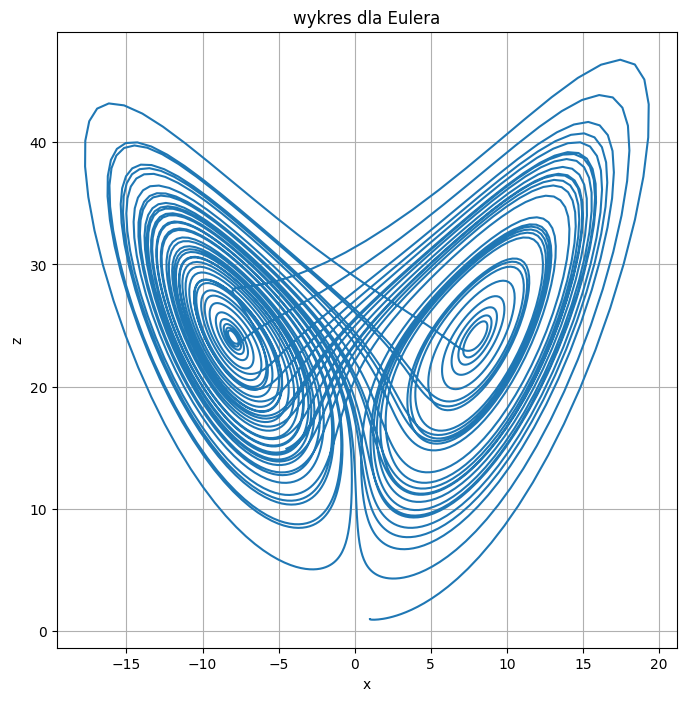

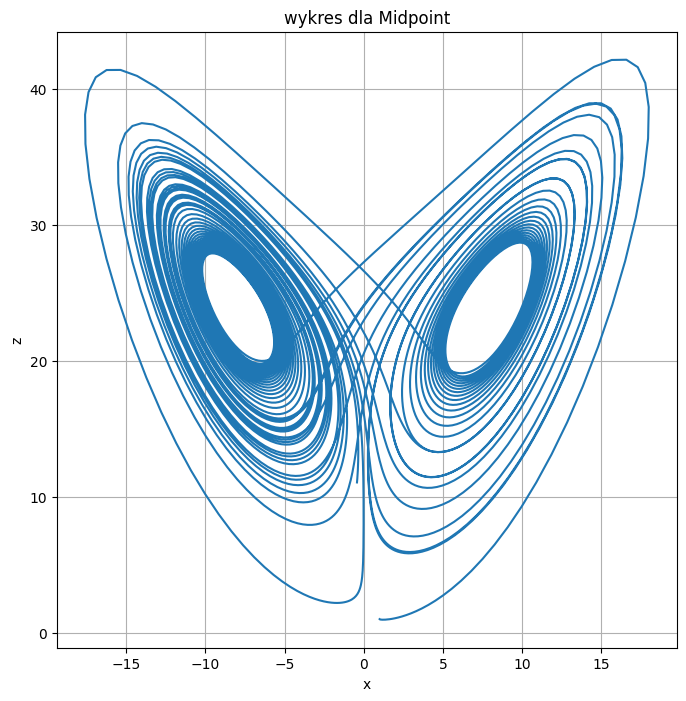

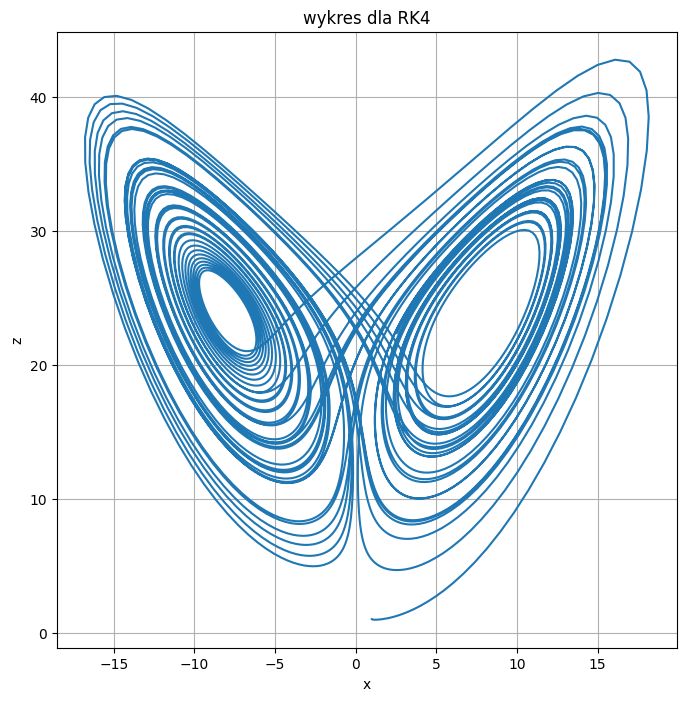

In [83]:
eulerX,eulerY,eulerZ = euler()
midpointX,midpointY,midpointZ = midpoint()
rk4X,rk4Y,rk4Z = rk4()

rysujWykres(eulerX,eulerZ,"wykres dla Eulera")
rysujWykres(midpointX,midpointZ,"wykres dla Midpoint")
rysujWykres(rk4X,rk4Z,"wykres dla RK4")